In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [2]:
df = pd.read_csv('../原始数据集/ETTm1.csv')
df.head(2)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,7/1/2016 0:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,7/1/2016 0:15,5.760,2.076,1.492,0.426,4.264,1.401,30.459999


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69680 entries, 0 to 69679
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    69680 non-null  object 
 1   HUFL    69680 non-null  float64
 2   HULL    69680 non-null  float64
 3   MUFL    69680 non-null  float64
 4   MULL    69680 non-null  float64
 5   LUFL    69680 non-null  float64
 6   LULL    69680 non-null  float64
 7   OT      69680 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.3+ MB


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.describe()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,69680,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000
mean,2017-06-28 21:52:30,7.413993,2.261418,4.322226,0.896509,3.082888,0.857907,13.320642
min,2016-07-01 00:00:00,-23.242001,-5.693000,-26.367001,-6.041000,-1.188000,-1.371000,-4.221000
25%,2016-12-29 10:56:15,5.827000,0.804000,3.305000,-0.284000,2.315000,0.670000,6.964000
50%,2017-06-28 21:52:30,8.841000,2.210000,6.005000,0.959000,2.833000,0.975000,11.396000
75%,2017-12-27 08:48:45,11.788000,3.684000,8.635000,2.203000,3.655000,1.218000,18.079000
max,2018-06-26 19:45:00,24.180000,10.315000,18.087000,7.853000,8.498000,3.046000,46.007000
std,NaN,7.082928,2.041293,6.829189,1.807239,1.174063,0.600440,8.564817


均值为：13.321，标准差为：8.565
KstestResult(statistic=0.0933397609947807, pvalue=0.0, statistic_location=11.67800045, statistic_sign=1)
异常值共627条


(-10.0, 70000.0)

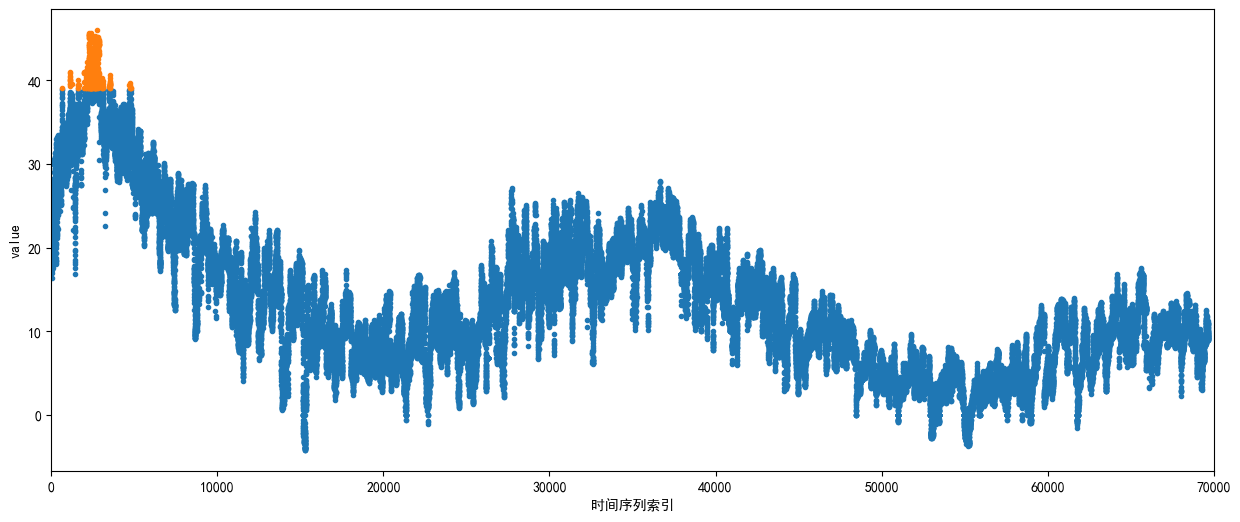

In [13]:
import numpy as np
from scipy import stats


mean = df['OT'].mean()  # 计算均值

std = df['OT'].std()  # 计算标准差

print('均值为：%.3f，标准差为：%.3f' % (mean, std))
print(stats.kstest(df['OT'], 'norm', (mean, std)))


fig, ax = plt.subplots(figsize=(15, 6))

# df['OT'].plot(kind='kde', grid=True, style='-k', title='ETTh1', ax=ax1)

error = df['OT'][np.abs(df['OT'] - mean) > 3 * std]

data_c = df['OT'][np.abs(df['OT'] - mean) <= 3 * std]

print('异常值共%i条' % len(error))

# 筛选出异常值error、剔除异常值之后的数据data_c
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.scatter(data_c.index, data_c, marker='.', alpha=1, label='正常值')

ax.scatter(error.index, error, marker='.', alpha=1, label='异常值')
ax.set_xlabel('时间序列索引')
ax.set_ylabel('value')
ax.set_xlim([-10, 70000])



In [7]:
data = pd.DataFrame(data_c)
error = pd.DataFrame(error)
data.to_csv('output/ETTm1_normal.csv')
error.to_csv('output/ETTm1_error.csv')

In [7]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# 使用Loess平滑
smoothed_values = lowess(df['OT'], np.arange(len(df['OT'])), frac=0.005)

In [8]:
# 将平滑值添加到数据框中
df['smoothed'] = smoothed_values[:, 1]


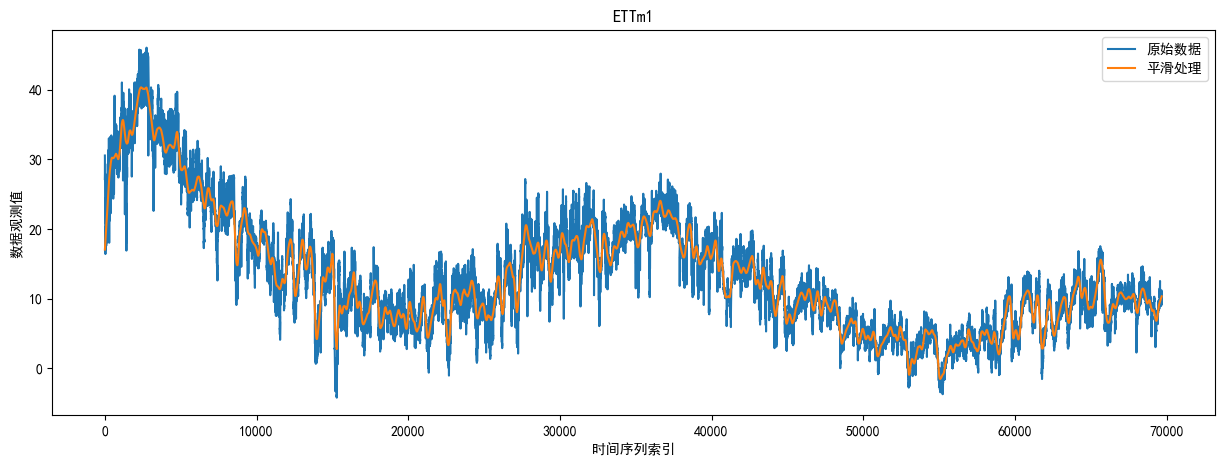

In [9]:
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.figure(figsize=(15,5))
plt.plot(df['OT'], label='原始数据')
plt.plot(df['smoothed'], label='平滑处理')
plt.title('ETTm1')
plt.legend()
plt.xlabel('时间序列索引')
plt.ylabel('数据观测值')
plt.rcParams['axes.unicode_minus'] = False
plt.show()